<a href="https://colab.research.google.com/github/kzhang93/pyotp/blob/develop/%E2%80%9CAssignment_1_2022_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Friday Week 7 - Fri 8 April 2022 11:59PM </div>

# 1. Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

# 2. Dataset description
The dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The features of the 5,000 test examples are given, you will analyse the performance of your proposed method by uploading the predicted labels of test examples onto [Kaggle Leaderboard](https://www.kaggle.com/t/a781604ffe46a42f903dd4be1b9daf16). You can find the instruction of using the leaderboard in Part 5.2. The leaderboard will compute the accuracy of your model, and team ranking will be shown based on the performance. Please note that we provide only PART of the original Fashion-MNIST, you must use the GIVEN `train.csv` (not the original dataset from the official website) for training; or it will be considered as cheating. <br />
Here are examples illustrating samples of the dataset (each class takes one row):

### <img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:

    - 0 T-shirt/Top
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot

# 3. How to load the data and make output prediciton
There is a Input folder including only 2 files (which can be downloaded from Canvas):

    1. train.csv (30000 image samples for training including features and label) 
    2. test_input.csv (5000 images for prediction)

## 3.1 How to load the data

To read the *csv* file and load the data into a dataframe using pandas. 

The **training data files are in the ./Input/train** and **testing data file are in ./Input/test**. <br /> Use the following code:

In [2]:
import pandas as pd
import os
import numpy as np
print(os.listdir("/content/A1/Input/train"))
pd.set_option('display.max_columns', 10)

['train.csv']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('/content/A1/Input/train/train.csv') 

In [ ]:
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,0,0,0,0,0,...,0,0,0,0,2
1,1,0,0,0,0,...,0,0,0,0,1
2,2,0,0,0,0,...,0,0,0,0,1
3,3,0,0,0,1,...,0,0,0,0,4
4,4,0,0,0,0,...,0,0,0,0,8


Then data would be a dataframe with 30000 samples including 784 features (from v1 to v784) and its label.

In [5]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable 
data_train_label = data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

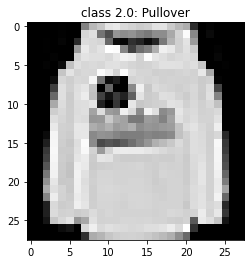

In [6]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

## 3.2 How to loading test data and output the prediction

In [13]:
# test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('/content/A1/Input/test/test_input.csv', index_col=0) 

In [6]:
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


After making a prediction on test data, all predicted lables will be saved in “test_output.csv”. You may use the following code to generate an output file that meets the requirement. The output file will be uploaded to both Kaggle and Canvas.

In [ ]:
# assume output is the predicted labels from classifiers using input as data from test_input.csv
# (5000,)

output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./Output/test_output.csv', sep=",", float_format='%d', index_label="id")

NameError: ignored

We will load the output file using the code for loading data above. It is your responsibility to make sure the output file can be correctly loaded using this code.
The performance of your classifier will be evaluated in terms of the top-1 accuracy metric, i.e.<br /><br />
<div style="text-align: center"> $$\text{Accuracy} = \frac{\text{Number of correct classifications}}{\text{Total number of test examples used}} * 100\%$$

# 4. Task description

Your task is to determine / build a classifier for the given data set to classify images into categories and write a report. The score allocation is as follows:

    1. Code: max 65 points
    2. Report: max 35 points
    
Please refer to the **rubric** in Canvas (Canvas -> Assignment1 -> Rubric) for detailed marking scheme. The report and the code are to be submitted in Canvas by the due date.<br />

## 4.1 Code
### The code must clearly show :
    1. Pre-process data
    2. Details of your implementation for each algorithm
    3. Fine-tune hyper-parameters for each algorithm and running time
    4. The comparison result between 4 different algorithms including 3 single methods and one ensemble method
    5. Hardware and software specifications of the computer that you used for performance evaluation

### 4.1.1 Data pre-processing

You will need to have at least one pre-process techique before you can apply the classification algorithms. Pre-process techique can be **Normalisation**, **PCA**, etc.

In [ ]:
from numpy.lib.function_base import cov
def PCA(new_data,new_element):
  calculated_mean = np.mean(new_data,axis=0)
  new_sample,data_train_feature = np.shape(new_data)
  matrix_for_average =np.tile(calculated_mean,(new_sample,1))

  centralization_for_data = new_data - matrix_for_average 
  coveriance_matrix = np.dot(np.transpose(centralization_for_data),centralization_for_data)
  eigen_value,eigen_vectors = np.linalg.eig(coveriance_matrix)
  index_for_value = np.argsort(eigen_value) 
  index_for_vector = index_for_value[:-(new_element+1):-1]
  new_feature = eigen_vectors[:,index_for_vector]
    
  decreased_dimension_data = np.dot(centralization_for_data,new_feature)
    
  final_data = np.dot(decreased_dimension_data,np.transpose(new_feature)) + matrix_for_average 
    
  return decreased_dimension_data
  return final_data 







In [ ]:
from sklearn.preprocessing import MinMaxScaler
NewScalar = MinMaxScaler()
NewScalar.fit(data_train_df)
train_normalization = NewScalar.transform(data_train_df)
test_norm = NewScalar.transform(data_test_df)


### 4.1.2 Classification algorithms 

You will now apply multiple classifiers to the pre-processed dataset. You have to implement at least 3 classifiers in particular:

    1. Nearest Neighbor
    2. Logistic Regression
    3. Naïve Bayes 
    4. Decision Tree
    5. SVM

and one ensemble method:
    
    1. Bagging
    2. Boosting
    3. Random forest
    
For binary classifiers, we can use those classifiers for the data which has more than 2 labels using the one-vs-rest method. The implementation can use sklearn, or can be implemented from scratch.

### 4.1.3 Parameter Tuning

For each classifiers we would like to find the best parameters using grid search with k-fold (k>=5) cross validation.

### 4.1.4 Classifier comparisons

After finding the best parameter for each algorithm, we would like to make comparisons between all classifiers using their own best hyper-parameters.

## 4.2 Report

### The report must clearly show:
    1. Details of your classifiers using for assignment 1
    2. The predicted results from your classifier on test examples
    3. Results comparison and discussion
    4. Following the format in rubric : Introduction -> Methods -> Experiments result and discussion -> Conclusion
    5. The maximum length of the report is 10 (excluding appendix and references)
    6. Clearly provide instructions on how to run your code, hardware and software environments in the Appendix section of your report
    7. Detail of student including ID, name
    8. Please also refer rubric on Canvas for more detail

# 5. Instructions to hand in the assignment

## 5.1 Submit to Canvas

### Go to Canvas -> Assignments -> "Assignment 1" and submit 4 files: the report, the code files, and output file.

   1. Report (a .pdf file).

   2. Code (2 files include: a .ipynb file and a PDF file). PDF is exported from .ipynb file for plagiarism check. The code must be able to be run with the following folder structure:

        - Notebook file (in the root folder): Your .ipynb file containing all Python code. The PDF file is generated from .ipynb file (File => Save as PDF file).
    
        - Input and Output folders: We will copy Input folder including all data and Output folder along with your notebook file to run your code. Please make sure your code is able to read the dataset from this Input folder and generate the output file to Output folder. (No need to submit the dataset and folder)

   3. Output file (test_output.csv).

If this is an individual work, an individual student still have to register the group on Canvas and submit all the files which must be named with student ID numbers following format e.g. **SIDxxxx_report.pdf**,  **SIDxxxx_code.ipynb**, **SIDxxxx_code.ipynb.pdf**.

If this is a group work of 2, all students need to form a group on Canvas and one student submits all the files which must be named with student ID numbers of 2 members following format e.g. **SIDxxxx1_SIDxxxx2_report.pdf**,  **SIDxxxx1_SIDxxxx2_code.ipynb**, **SIDxxxx1_SIDxxxx2_code.ipynb.pdf**.


## 5.2 Submit to Kaggle

### Go to Kaggle ->  Join Competition -> Data (Download dataset) -> Submit Predictions
We use the Kaggle leaderboard for assignment 1. Follow the steps below to use the leaderboard:

   1. Use the [Kaggle link](https://www.kaggle.com/t/a781604ffe46a42f903dd4be1b9daf16) to join the competition, you need to create a Kaggle account if you don't have one.
   
   2. Go to Team -> Use your Canvas Group ID as your team name. You can create a Kaggle team with up to 2 members.

   3. Go to Description -> Check the IMPORTANT NOTES for the assignment.
    
   4. Go to Data -> Download the training data, build your models.
    
   5. Submit Predictions -> Follow the submission format and submit your prediction output file (test_output.csv).

   6. Leaderboard -> Check your accuracy score at the Leaderboard.

**IMPORTANT**: This link is only available to the students of COMP5318. All groups need to submit test_output.csv to Kaggle for marking puporse. Only 5 submissions are allowed per day for Kaggle. Group ID on Canvas and Kaggle have to be unique otherwise the submission will not be marked for the Accuracy part.

Kaggle link: https://www.kaggle.com/t/a781604ffe46a42f903dd4be1b9daf16

### A penalty of MINUS 5 percent (-5%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

### All files required for assignment 1 can be downloaded from Canvas -> Assignments -> Assignment 1


# 6. Inquiries after releasing the marking

**After Assignment 1 marks come out, please submit your inquiries about marking within the 1st week. All inquiries after that will be ignored.**

# 7. Academic honesty

Please read the University policy on Academic Honesty very carefully: 
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include: 

    * a permanent record of academic dishonesty on your student file, 
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa. 

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating!